In [1]:
import sys
sys.path.append('/home/chuikova/chuikova2/lib/python2.7/site-packages/')
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imageio
from numpy.linalg import norm
from tqdm import tqdm

%matplotlib inline

In [2]:
img = '0134'

In [3]:
imgL = cv2.imread('{}l.png'.format(img), 0)
imgR = cv2.imread('{}r.png'.format(img), 0)

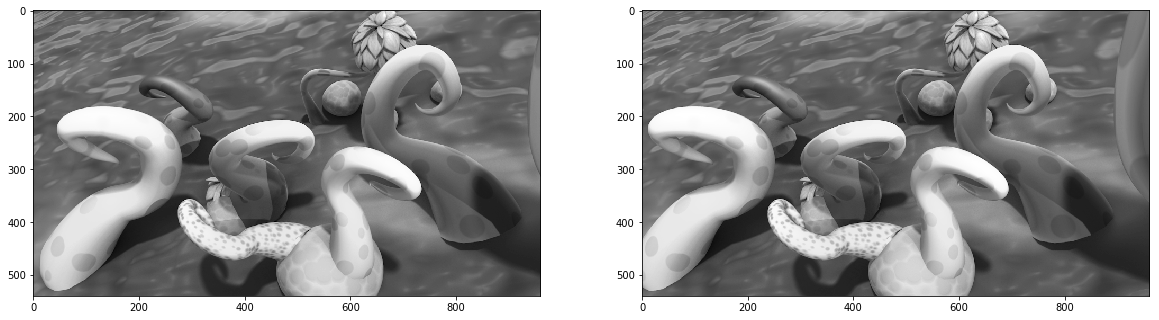

In [4]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.imshow(imgL, cmap="gray")
plt.subplot(122)
plt.imshow(imgR, cmap="gray")

In [70]:
number = np.arange(1,10)*16
block = np.arange(3, 40)*2-1
#acc = 0 b = 27 n = 48
zeros = 0
best_b = 0
best_num = 0
final_norm = np.inf
norms = []

for num in tqdm(number):
    for b in block:
        stereo = cv2.StereoBM_create(numDisparities=num, blockSize=b)
        disparity = stereo.compute(imgL,imgR)
        true_image = np.array(imageio.imread('{}r.png'.format(img)))
        init_image  = np.array(imageio.imread('{}l.png'.format(img)))

        new_image = np.zeros_like(true_image)
        m, n, _ = true_image.shape

        x = np.linspace(0, m-1, m)
        y = np.linspace(0, n-2, n-1)
        xx, yy = np.meshgrid(x, y)
        i, j = np.array(xx, dtype = int), np.array(yy, dtype = int)
        new_image[i, j-disparity[i, j]//16] = init_image[i, j]
        
        true = np.array(true_image, dtype=int)
        new = np.array(new_image, dtype=int)
        norma = norm((true[new>0]-new[new>0]))
        norms.append(norma)
        
        if norma < final_norm:
            #acc = (new_image == true_image).mean()
            final_norm = norma
            zeros = (new_image == 0).mean()
            best_b = b
            best_num = num

100%|██████████| 9/9 [00:41<00:00,  4.64s/it]


In [71]:
print final_norm, zeros, best_b, best_num

17275.359099 0.171392103909 17 48


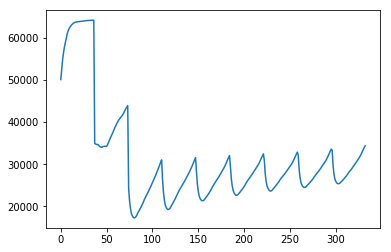

In [72]:
plt.plot(norms)

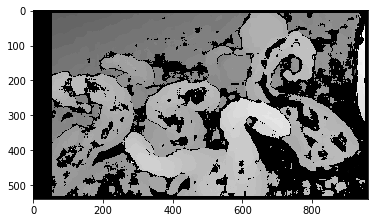

In [73]:
stereo = cv2.StereoBM_create(numDisparities=48, blockSize=17)
disparity = stereo.compute(imgL,imgR)
        
plt.imshow(disparity//16,'gray')
plt.show()

In [74]:
disparity[-13:, 100]
#bot

array([-16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16], dtype=int16)

In [347]:
disparity[100, -13:]
#right

array([-16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16], dtype=int16)

In [333]:
disparity[100, :60]
#left 

array([-16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16,
       -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16,
       -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16,
       -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16,
       -16, -16, -16, -16, -16, -16, -16, -16], dtype=int16)

In [336]:
disparity[:13, 100]
#top

array([-16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16, -16], dtype=int16)

In [86]:
disparity.max()

752

In [ ]:
disparity[:13, 100]
#top

In [75]:
true_image = np.array(imageio.imread('{}r.png'.format(img)))
init_image  = np.array(imageio.imread('{}l.png'.format(img)))

new_image = np.zeros_like(true_image)
m, n, _ = true_image.shape

x = np.linspace(0, m-1, m)
y = np.linspace(0, n-2, n-1)
xx, yy = np.meshgrid(x, y)
i, j = np.array(xx, dtype = int), np.array(yy, dtype = int)
new_image[i, j-disparity[i, j]//16] = init_image[i, j]
'''
plt.figure(figsize=(20, 18))
plt.subplot(311)
plt.imshow(init_image[:,50:])
plt.subplot(312)
plt.imshow(new_image[:,50:])
plt.subplot(313)
plt.imshow(true_image[:,50:])
'''

'\nplt.figure(figsize=(20, 18))\nplt.subplot(311)\nplt.imshow(init_image[:,50:])\nplt.subplot(312)\nplt.imshow(new_image[:,50:])\nplt.subplot(313)\nplt.imshow(true_image[:,50:])\n'

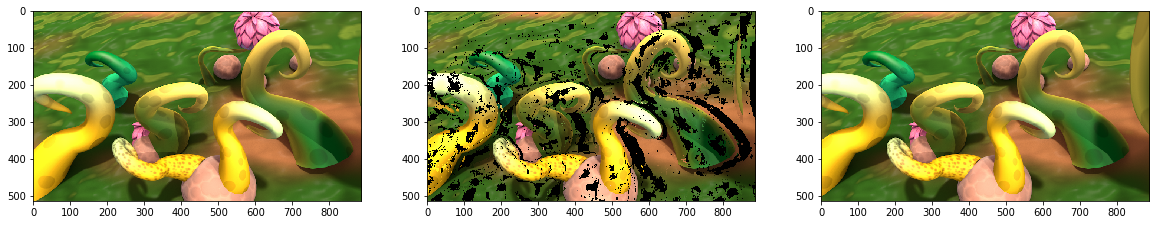

In [76]:
plt.figure(figsize=(20, 18))
plt.subplot(131)
plt.imshow(init_image[13:-13,60:-13])
plt.subplot(132)
plt.imshow(new_image[13:-13,60:-13])
plt.subplot(133)
plt.imshow(true_image[13:-13,60:-13])

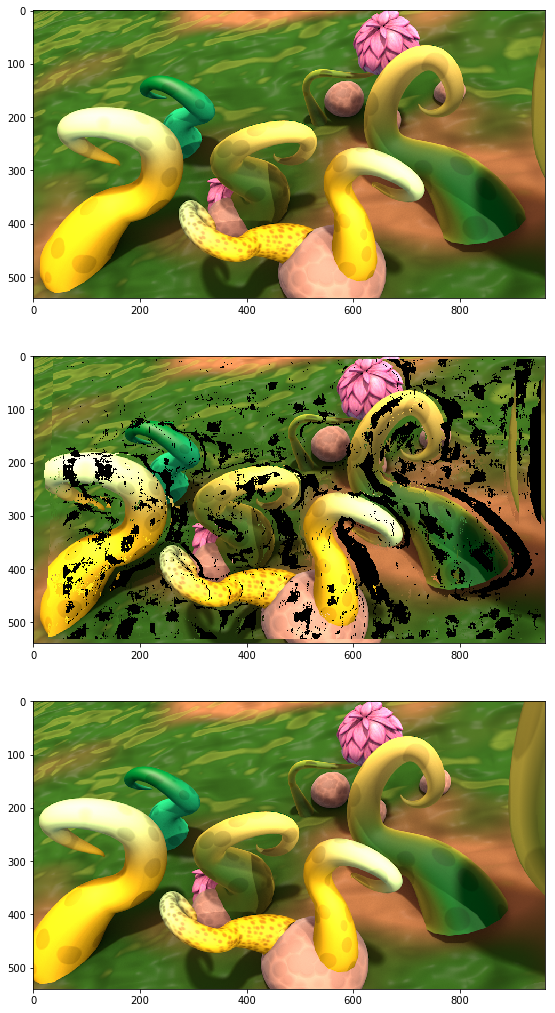

In [88]:
plt.figure(figsize=(20, 18))
plt.subplot(311)
plt.imshow(init_image)
plt.subplot(312)
plt.imshow(new_image)
plt.subplot(313)
plt.imshow(true_image)

In [80]:
true = np.array(true_image, dtype=int)
new = np.array(new_image, dtype=int)
norma = norm((true[new>0]-new[new>0]), ord=np.inf)

In [81]:
norma

254.0

In [41]:
(true-new)[0]

array([[ 68, 123,  35],
       [  8,  15,   5],
       [  9,  16,   5],
       ..., 
       [ 53,  -8, -17],
       [ 49, -10, -20],
       [ 44, -13, -22]])

In [44]:
(true-new1)[0]

array([[ 68, 123,  35],
       [  8,  15,   5],
       [  9,  16,   5],
       ..., 
       [ 53,  -8, -17],
       [ 49, -10, -20],
       [ 44, -13, -22]])

In [31]:
new1 = new

In [22]:
norm((true-new)[0], ord=np.inf)

362.0

In [14]:
normaек

1309.0

In [385]:
(true_image[13:-13,60:-13] - new_image[13:-13,60:-13] < 20).mean()

0.56552713426537227

In [356]:
(new_image[13:-13,60:-13] == 0).mean()

0.16086737819812627

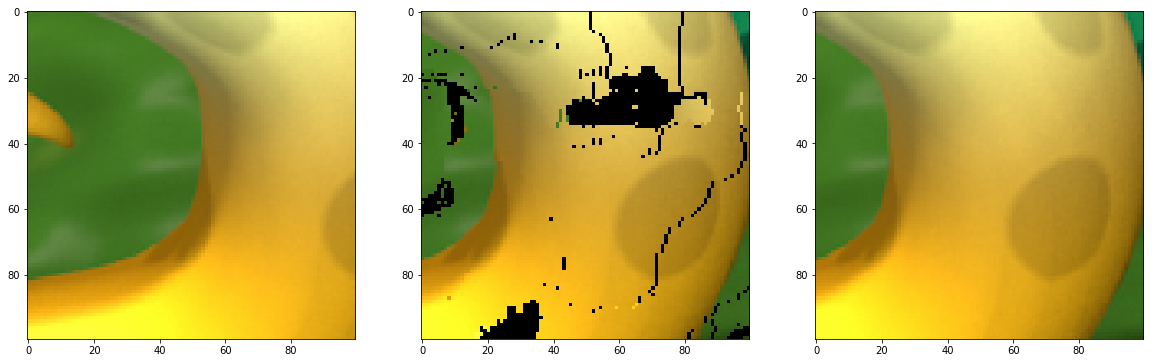

In [360]:
plt.figure(figsize=(20, 18))
plt.subplot(131)
plt.imshow(init_image[250:350, 150:250])
plt.subplot(132)
plt.imshow(new_image[250:350, 150:250])
plt.subplot(133)
plt.imshow(true_image[250:350, 150:250])

In [361]:
(new_image[250:350, 150:250] == true_image[250:350, 150:250]).mean()

0.25259999999999999

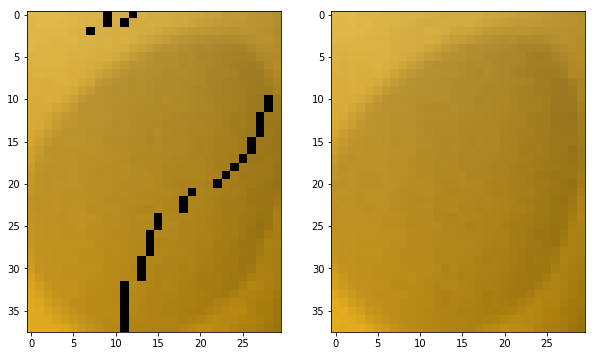

In [371]:
plt.figure(figsize=(10, 20))
plt.subplot(121)
plt.imshow(new_image[292:330, 210:240])
plt.subplot(122)
plt.imshow(true_image[292:330, 210:240])

In [372]:
(new_image[292:330, 210:240] == true_image[292:330, 210:240]).mean()

0.26666666666666666

In [423]:
a = np.array(true_image[292:330, 210:240, 1], dtype=int)
b = np.array(new_image[292:330, 210:240, 1], dtype=int)

In [434]:
norm(a-b, ord=np.inf)

113.0

In [448]:
number = np.arange(1,72)*16
block = np.arange(3, 40)*2-1
zeros = 0
best_b = 0
best_num = 0
final_norm = np.inf

for num in number:
    for b in block:
        stereo = cv2.StereoBM_create(numDisparities=num, blockSize=b)
        disparity = stereo.compute(imgL,imgR)
        true_image = np.array(imageio.imread('{}r.png'.format(img)))
        init_image  = np.array(imageio.imread('{}l.png'.format(img)))

        new_image = np.zeros_like(true_image)
        m, n, _ = true_image.shape

        x = np.linspace(0, m-1, m)
        y = np.linspace(0, n-2, n-1)
        xx, yy = np.meshgrid(x, y)
        i, j = np.array(xx, dtype = int), np.array(yy, dtype = int)
        new_image[i, j-disparity[i, j]//16] = init_image[i, j]
        
        true = np.array(true_image, dtype=int)
        new = np.array(new_image, dtype=int)
        norma = norm(a-b, ord=np.inf)
        
        if norma < final_norm:
            #acc = (new_image == true_image).mean()
            final_norm = norma
            zeros = (new_image == 0).mean()
            best_b = b
            best_num = num

KeyboardInterrupt: 

In [445]:
print final_norm, zeros, best_b, best_num

2746.0 0.0059799382716 77 16
